In [1]:
from sena.data.norec_sentence.dataloader import load_full_dataset
import pandas as pd

In [2]:
data = load_full_dataset()

train = data['train']
val = data['dev']
test = data['test']

combined_data = pd.concat([train, val, test]).reset_index(drop=True)

print(f"Train: {train.shape}")
print(f"Val: {val.shape}")
print(f"Test: {test.shape}")
print(f"Combined: {combined_data.shape}")

Train: (7973, 3)
Val: (1411, 3)
Test: (1181, 3)
Combined: (10565, 3)


In [3]:
combined_data

,sent_id,text,label
0,201911-01-01,Philips 190G6,1
1,201911-02-01,Med integrerte høyttalere som på ingen måte er...,1
2,201911-02-02,Eller bedrar skinnet ?,0
3,201911-03-01,"De fleste skjermer har et diskret design , med...",1
4,201911-03-02,Men 190G6 fra Philips er en helt annen historie .,1
...,...,...,...
10560,601408-06-01,Han mener disse 14 er ukjente .,1
10561,601408-06-02,"Ja , de fleste er nok det , men i alle fall He...",0
10562,601408-06-03,Som ektefellen til Kirsten Flagstad er hans hi...,0
10563,601408-07-01,"De 14 "" ukjente landssvikerne "" som profiterte...",0


<AxesSubplot:>

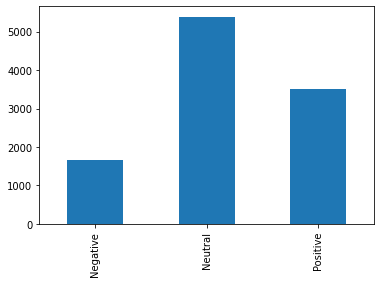

In [4]:
combined_data["label"].replace({0: "Negative", 1: "Neutral", 2: "Positive"}).value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='Frequency'>

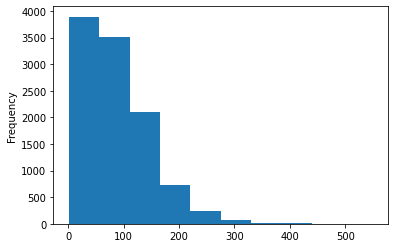

In [5]:
combined_data["text"].str.len().plot.hist()

In [6]:
aggregated_data = combined_data.groupby("label")["text"].apply(" ".join).reset_index()

positive_texts = aggregated_data[aggregated_data["label"] == 2]["text"].values[0]
neutral_texts = aggregated_data[aggregated_data["label"] == 1]["text"].values[0]
negative_texts = aggregated_data[aggregated_data["label"] == 0]["text"].values[0]

In [7]:
from sena.utils.preprocessing import load_stopwords
from collections import Counter
from tqdm import tqdm

stopwords = load_stopwords()

combined_text = (positive_texts + neutral_texts + negative_texts).split(" ")
word_counter = Counter()
for word in tqdm(combined_text, desc="Counting words"):
    if word not in stopwords and word.isalpha():
        word_counter[word] += 1

Counting words: 100%|██████████| 169442/169442 [00:00<00:00, 274624.44it/s]


In [8]:
word_counter.most_common(10)

[('Det', 798),
 ('Men', 389),
 ('I', 332),
 ('Og', 286),
 ('får', 285),
 ('Den', 285),
 ('år', 252),
 ('The', 248),
 ('litt', 245),
 ('gjør', 230)]

In [9]:
from wordcloud import WordCloud

positive_wordcloud = WordCloud(stopwords=stopwords).generate(positive_texts)
negative_wordcloud = WordCloud(stopwords=stopwords).generate(negative_texts)
neutral_wordcloud = WordCloud(stopwords=stopwords).generate(neutral_texts)

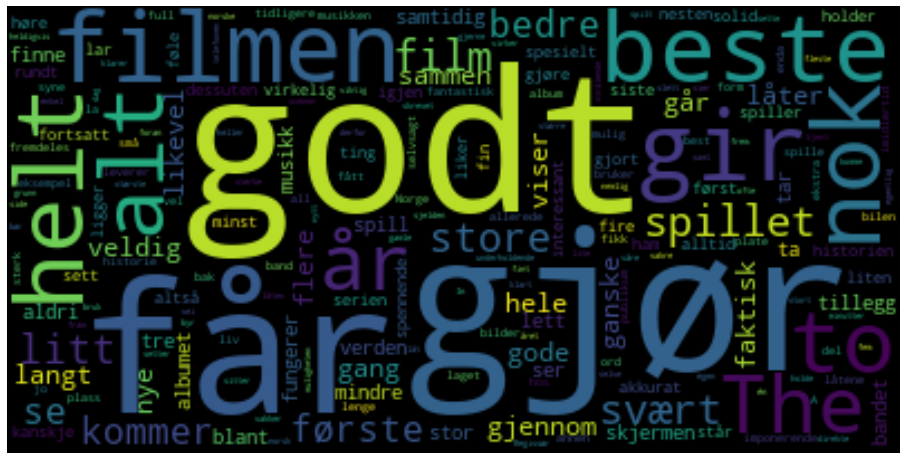

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

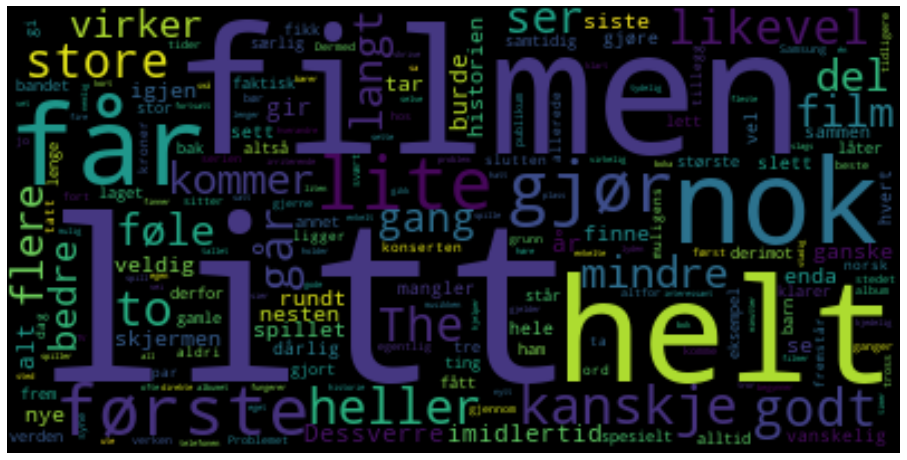

In [11]:
plt.figure(figsize=(16, 9))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

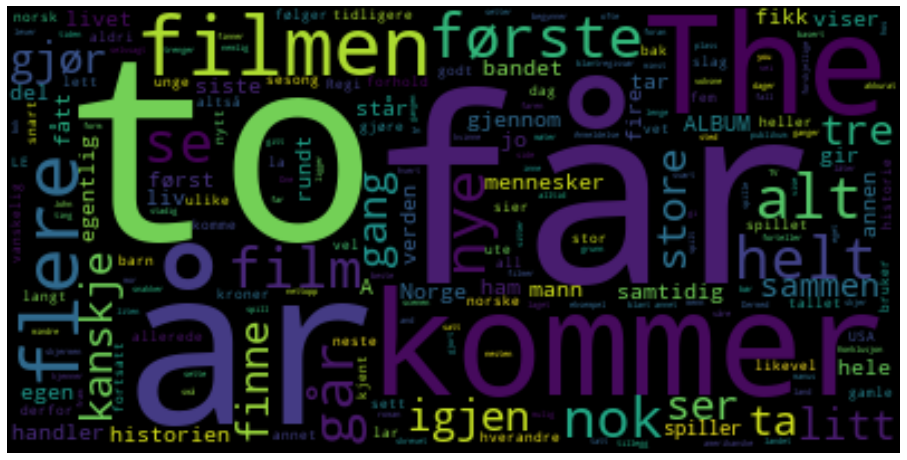

In [12]:
plt.figure(figsize=(16, 9))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()